# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

### Описание полей данных

- BeginDate – дата начала пользования услугами.
- EndDate – дата окончания пользования услугами.
- Type – тип оплаты: ежемесячный, годовой и тд.
- PaperlessBilling – электронный платежный документ.
- PaymentMethod – способ оплаты.
- MonthlyCharges – ежемесячные траты на услуги.
- TotalCharges – всего потрачено денег на услуги.
- Dependents – наличие иждивенцев.
- Senior Citizen – наличие пенсионного статуса по возрасту.
- Partner – наличие супруга(и).
- MultipleLines – наличие возможности ведения параллельных линий во время звонка.

# проект работы:
- **Исследование я разделю на 3 глобальных этапа которые будут включать в себя следующие этапы:**
1.	Предобработка данных (ознакомлюсь в датафреймами, посмотрю на типы данных при необходимости изменю их, посмотрю на наличие пропусков
2.	Исследовательский анализ данных (EDA) –более подробно изучу данные, посмотрю на закономерности, построю различные графики, более подробно определю имеются ли неявные пропуски, скорее всего соединю 4 дф в 1 дф,  далее будет видно в ходе исследования есть ли в этому необходимость, займусь фичинг инжинирингом.
3.	Обучение модели и определение лучшей модели машинного обучения
(разделю дф на выборки тестовая выборка будет равна 0,25), при необходимости произведу кодирование признаков, подберу гиперпараметры для моделей, проведу выбор модели с использованием кроссвалидации, итоговую модель проверю на тестовой выборке 


In [2]:
#установлю необходимые библиотеки
!pip install phik
!pip install scikit-learn==1.1.3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm



from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from catboost import CatBoostClassifier
import lightgbm as lgbm
from sklearn.model_selection import train_test_split, GridSearchCV
import time
from sklearn.preprocessing import StandardScaler
import itertools
import phik
from phik import resources, report
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)


In [2]:
try:
    data_contract = pd.read_csv('C:/Users/Sergio/Desktop/Diplom_project/contract_new.csv')
except:
    data_contract = pd.read_csv('/datasets/contract_new.csv')
try:
    data_internet = pd.read_csv('C:/Users/Sergio/Desktop/Diplom_project/internet_new.csv')
except:
    data_internet = pd.read_csv('/datasets/internet_new.csv')
try:
    data_personal = pd.read_csv('C:/Users/Sergio/Desktop/Diplom_project/personal_new.csv')
except:
    data_personal = pd.read_csv('/datasets/personal_new.csv') 
try:
    data_phone = pd.read_csv('C:/Users/Sergio/Desktop/Diplom_project/phone_new.csv')
except: 
    data_phone = pd.read_csv('/datasets/phone_new.csv')

In [3]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
data_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [5]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [6]:
data_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [8]:
data_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [10]:
data_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Пропусков нет

In [11]:
data_contract.duplicated().sum()
#data_internet.duplicated().sum()
#data_personal.duplicated().sum()
#data_phone.duplicated().sum()


0

дубликатов нет

# Проанилизировав 4 дата фрейма можно сделать следующие выводы:
- data_contract (8 столбов в каждом 7043 значений, явных дубликатов не обнаруженно)
- data_internet (8 столбов  в каждом 5517 значений, явных дубликатов не обнаруженно)
- data_personal (5 столбов в каждом 7043 значений, явных дубликатов не обнаруженно)
- data_phone (3 столба в каждом 6361 значений, явных дубликатов не обнаруженно)
- проанализировав данные в столбе EndDate я вижу, что там находится информация с датой когда клиент перестал пользоваться услугами, следовательно данный столб можно пометить как целевой признак для  моделей.
- **Вопросов пока у меня нет, все понятно объяснено на вебинаре** 

# Исследовательский анализ данных (EDA)

In [12]:
data_contract['EndDate'] = data_contract['EndDate'].replace(['No'], ['2020-02-01'])
data_contract['TotalCharges'] = data_contract['TotalCharges'].replace([' '], 0)

In [13]:
data_contract['BeginDate'] = pd.to_datetime(data_contract['BeginDate'],format = '%Y-%m-%d')
data_contract['EndDate'] = pd.to_datetime(data_contract['EndDate'],format = '%Y-%m-%d')

In [14]:
data_contract['TotalCharges'] = data_contract['TotalCharges'].astype('float')
data_contract['TotalCharges'] = data_contract['TotalCharges'].astype('int')

- Соглстано рекомендаций полученных на вебинаре поставил заглушку в столбе ['EndDate'] указав дату договоров актуальных на 1 февраля 2020.
- Заполнил пропуски в ['TotalCharges'] 0
- Изменил тип данных ['BeginDate'], ['EndDate'] в datetime
- Изменил тип данных 'TotalCharges' в целочисленный тип данных

In [15]:
data_tel = data_contract.set_index('customerID').join(data_phone.set_index('customerID'))
data_tel = data_tel.join(data_personal.set_index('customerID'))
data_tel = data_tel.join(data_internet.set_index('customerID'))

In [16]:
data_tel.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31,NaN,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960,NaN,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No


In [17]:
data_tel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   int32         
 7   MultipleLines     6361 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup  

In [18]:
for column in ('InternetService', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'MultipleLines'
              ):
    data_tel[column] = data_tel[column].fillna('No')

объеденив дафа фреймы образовались пропуски в столбах, с помошью цикла избавился от пропусков

In [19]:
data_tel['churn'] = (data_tel['EndDate'] != "2020-02-01")

Определил целевой признак

In [20]:
data_tel['churn'] = data_tel['churn'].astype('int')

In [21]:
data_tel['churn'].value_counts(normalize=True)

0    0.843675
1    0.156325
Name: churn, dtype: float64

преобразую целевой признак по EndDate и создал новый столб ['churn'] с бинарным признаком оттока клиентов

Text(0, 0.5, 'Клиенты')

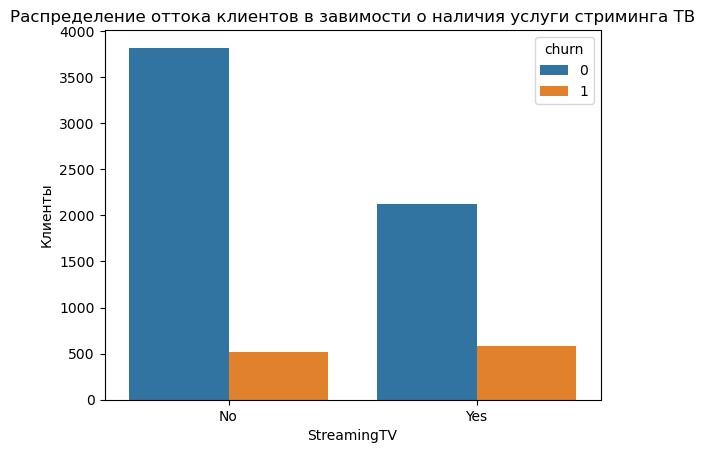

In [22]:
sns.countplot(x='StreamingTV', hue='churn', data=data_tel);
plt.title('Распределение оттока клиентов в завимости о наличия услуги стриминга ТВ') 
plt.ylabel('Клиенты') 

In [23]:
pd.crosstab(data_tel['churn'], data_tel['StreamingTV'], margins=True)

StreamingTV,No,Yes,All
churn,,,
0,3819,2123,5942
1,517,584,1101
All,4336,2707,7043


распределение оттока клиентов не сильно различается при наличии/отсутсвии стрименга ТВ

Text(0, 0.5, 'Клиенты')

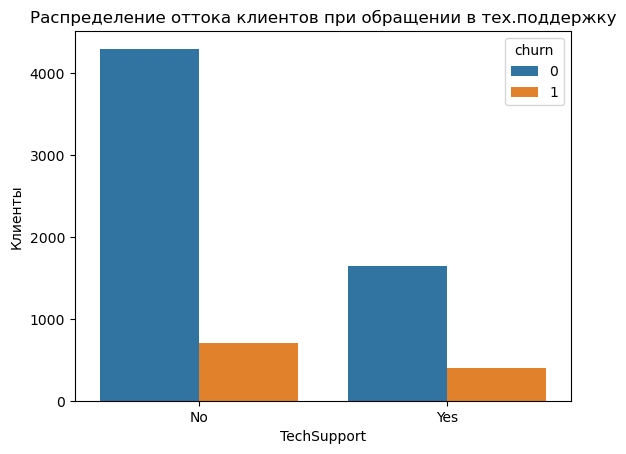

In [24]:
sns.countplot(x='TechSupport', hue='churn', data=data_tel);
plt.title('Распределение оттока клиентов при обращении в тех.поддержку') 
plt.ylabel('Клиенты') 

In [25]:
pd.crosstab(data_tel['churn'], data_tel['TechSupport'], margins=True)

TechSupport,No,Yes,All
churn,,,
0,4296,1646,5942
1,703,398,1101
All,4999,2044,7043


Из графика видно, что те кто реже обращалсь в тех поддержку, чаще отказывались от услуг

Text(0, 0.5, 'Клиенты')

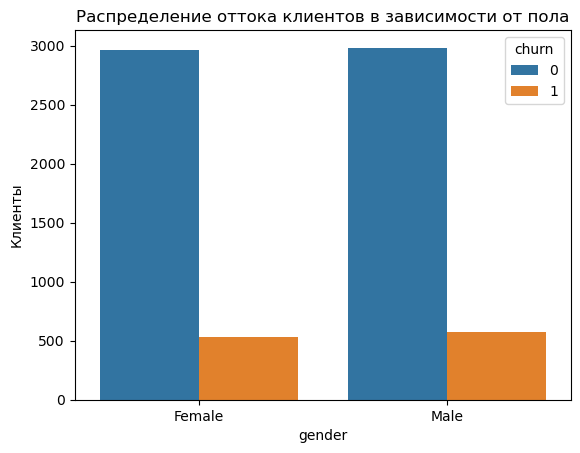

In [26]:
sns.countplot(x='gender', hue='churn', data=data_tel);
plt.title('Распределение оттока клиентов в зависимости от пола') 
plt.ylabel('Клиенты') 

In [27]:
pd.crosstab(data_tel['churn'], data_tel['gender'], margins=True)

gender,Female,Male,All
churn,,,
0,2960,2982,5942
1,528,573,1101
All,3488,3555,7043


и мужчины и женщины одинакого преращают пользоватсья услугами

Text(0, 0.5, 'Клиенты')

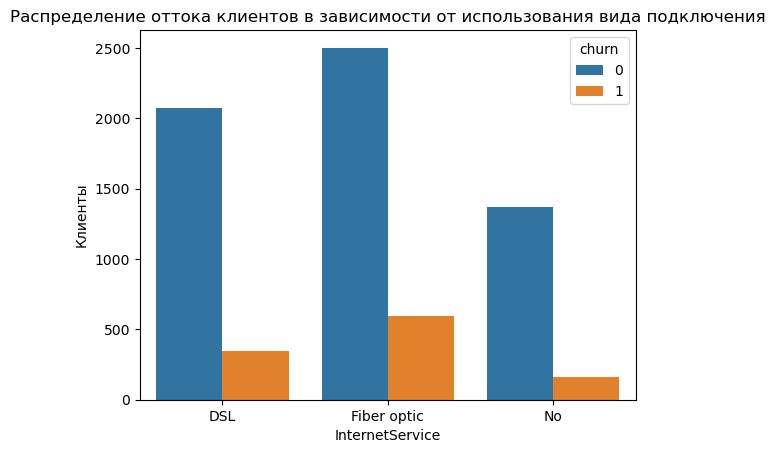

In [28]:
sns.countplot(x='InternetService', hue='churn', data=data_tel);
plt.title('Распределение оттока клиентов в зависимости от использования вида подключения') 
plt.ylabel('Клиенты') 

In [29]:
pd.crosstab(data_tel['InternetService'], data_tel['gender'], margins=True)

gender,Female,Male,All
InternetService,,,
DSL,1188,1233,2421
Fiber optic,1553,1543,3096
No,747,779,1526
All,3488,3555,7043


больше всего клиенты перестают пользоваться услугами которые имеют отическое подключение

Text(0, 0.5, 'Клиенты')

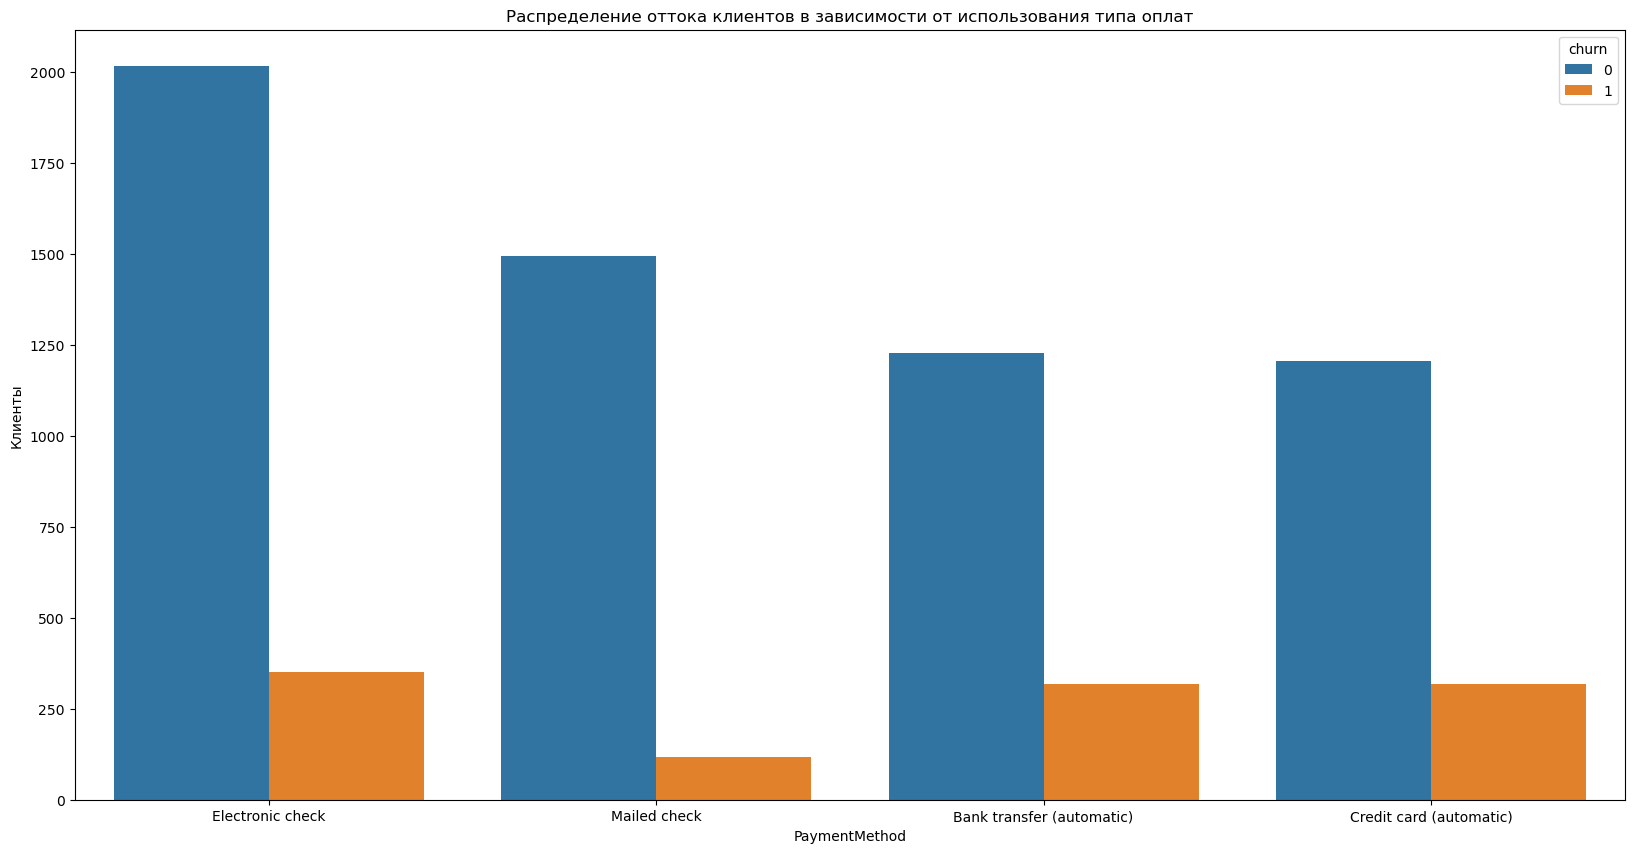

In [30]:
plt.figure(figsize=(20, 10))
sns.countplot(x='PaymentMethod', hue='churn', data=data_tel);
plt.title('Распределение оттока клиентов в зависимости от использования типа оплат') 
plt.ylabel('Клиенты') 

из графика видно, что больше всего оттока клиентов происходит те кто оплачивают елктромнным чеком, менее всего оттока у клиентов которые использует почтовыю оплату

In [31]:
data_tel.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31,No,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960,No,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No,0


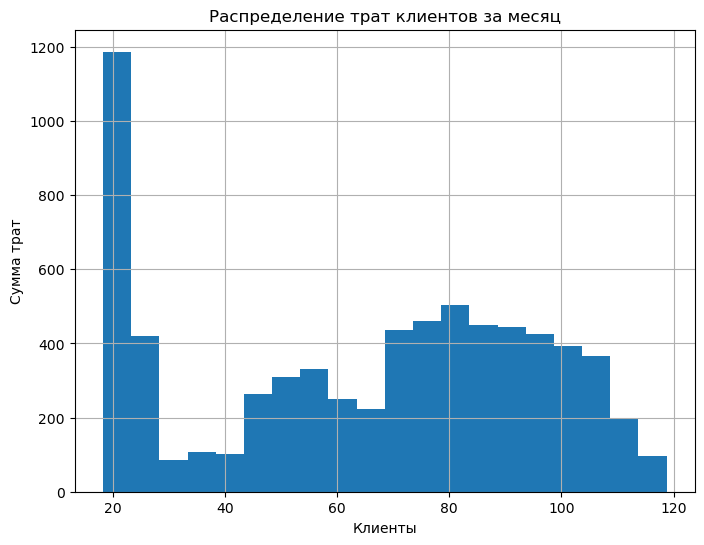

In [32]:
plt.figure(figsize=(8, 6))  
data_tel['MonthlyCharges'].hist(bins=20)  
plt.title('Распределение трат клиентов за месяц') 
plt.xlabel('Клиенты')  
plt.ylabel('Сумма трат')  
plt.show()
                                    

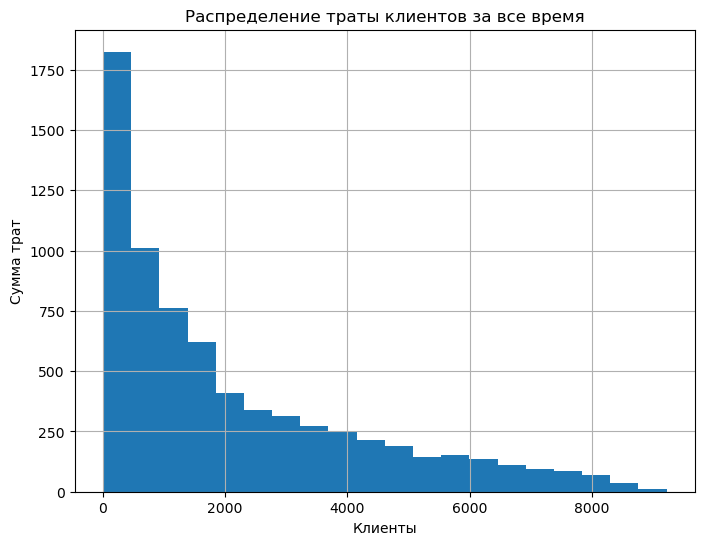

In [33]:
plt.figure(figsize=(8, 6))  
data_tel['TotalCharges'].hist(bins=20)  
plt.title('Распределение траты клиентов за все время') 
plt.xlabel('Клиенты')  
plt.ylabel('Сумма трат')  
plt.show()

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'churn']


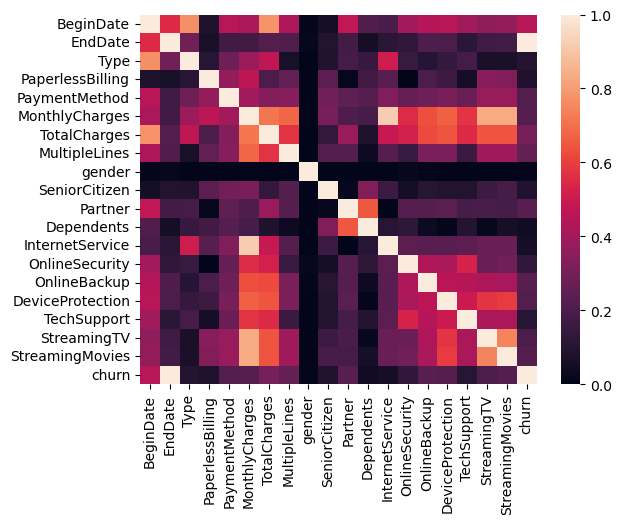

In [34]:
sns.heatmap(data_tel.phik_matrix());

Использвал библеотеку phik построил матрицу корреляции для категориальных признаков, проанализировов можно сказать следующее: есть высокая зависимость  интернет сервисов и месячной платы, а так же мульти коллениарность у churn и enddate, позже я удалю enddate. 

In [35]:
data_tel.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31,No,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071,No,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226,No,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960,No,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353,No,Female,0,No,No,Fiber optic,No,No,No,No,No,No,0


In [36]:
data_tel['AllDays'] = (data_tel['EndDate'] - data_tel['BeginDate']).dt.days

Создал новую колонку AllDays (всего сколько дней килент пользовался услугами)

In [37]:
random_st = 50623 

In [38]:
data_tel = data_tel.drop(['BeginDate', 'EndDate'], axis=1)

In [39]:
data_tel.shape

(7043, 19)

In [40]:
target = data_tel['churn'] 
features = data_tel.drop(columns=['churn'])

определил таргет и фичи

In [41]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=random_st)

разбил на выборки

In [42]:
#features_train_cod = pd.get_dummies(features_train, drop_first=True)
#features_test_cod = pd.get_dummies(features_test, drop_first=True)

In [43]:
ohe_features_train = features_train.select_dtypes(include='object').columns.to_list()
print(ohe_features_train)
ohe_features_test = features_test.select_dtypes(include='object').columns.to_list()
print(ohe_features_test)

['Type', 'PaperlessBilling', 'PaymentMethod', 'MultipleLines', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
['Type', 'PaperlessBilling', 'PaymentMethod', 'MultipleLines', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [44]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder_ohe.fit(features_train[ohe_features_train])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [45]:
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[ohe_features_train])
features_train = features_train.drop(ohe_features_train, axis=1)
features_train.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,AllDays,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
5949-EBSQK,61.45,307,0,153,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4760-XOHVN,19.45,38,0,62,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2607-FBDFF,49.00,49,0,31,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3125-RAHBV,20.30,455,0,671,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2829-HYVZP,19.80,574,0,883,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[ohe_features_test])
features_test = features_test.drop(ohe_features_test, axis=1)
features_test.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,AllDays,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
1608-GMEWB,93.90,4225,1,1371,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2070-FNEXE,76.45,636,1,245,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3771-PZOBW,90.70,1814,0,610,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2930-UOTMB,65.25,1175,0,518,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2951-QOQTK,80.80,404,0,153,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


применил кодирование методом OHE

In [47]:
columns_num = ['MonthlyCharges', 'TotalCharges', 'AllDays']

In [48]:
columns_num

['MonthlyCharges', 'TotalCharges', 'AllDays']

In [49]:
#columns_num = features_train.select_dtypes(exclude='object').columns.to_list()
#columns_num

In [50]:
scaler = StandardScaler()
scaler.fit(features_train[columns_num])
features_train = features_train.copy()
features_train[columns_num] = scaler.transform(features_train[columns_num])
features_test = features_test.copy()
features_test[columns_num] = scaler.transform(features_test[columns_num])

In [52]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 5949-EBSQK to 4648-YPBTM
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         5282 non-null   float64
 1   TotalCharges                           5282 non-null   float64
 2   SeniorCitizen                          5282 non-null   int64  
 3   AllDays                                5282 non-null   float64
 4   Type_One year                          5282 non-null   float64
 5   Type_Two year                          5282 non-null   float64
 6   PaperlessBilling_Yes                   5282 non-null   float64
 7   PaymentMethod_Credit card (automatic)  5282 non-null   float64
 8   PaymentMethod_Electronic check         5282 non-null   float64
 9   PaymentMethod_Mailed check             5282 non-null   float64
 10  MultipleLines_Yes                      5282 non-null   float64

маштабировал все численные данные

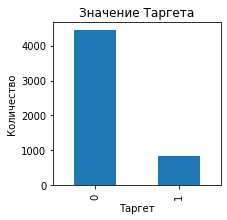

In [53]:
target_train.value_counts().plot(
    kind='bar', 
    figsize=(3, 3), 
    legend=False, 
    title='Значение Таргета', 
).set(xlabel='Таргет', ylabel='Количество')
plt.show()

Наблюдаю дисбаланс класснов, метрика ROC-AUC не чувствительна к дисбалансу классов, следовательно в балансировке классов нет необходимости.

In [54]:
#функция для расчета и построения графика ROC - Кривой
def plot_rc(target_test, predictions):
    fpr, tpr, thresholds = roc_curve(target_test, predictions)
    plt.figure(figsize=(10, 4))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title('ROC-Curve')
    plt.show()
    print('ROC-AUC score', roc_auc_score(target_test, predictions))

In [55]:
%%timeit
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'iterations': [50, 100, 200],
    'l2_leaf_reg': [2, 5, 10, 20]
}
model = CatBoostClassifier(random_state=random_st, verbose = 0)

search_cat = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search_cat.fit(features_train, target_train)

print(search_cat.best_params_)
print(search_cat.best_score_)


{'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.3}
0.9083807483765302


In [2]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'min_child_samples': [1, 5, 10],
    'num_threads':[1]
    }
model_LightGBM = lgbm.sklearn.LGBMClassifier(random_state=random_st, verbose = 0)
search_lgb = GridSearchCV(model_LightGBM, param_grid, cv=5, scoring='roc_auc')
search_lgb.fit(features_train, target_train)
print(search_lgb.best_params_)
print(search_lgb.best_score_)

In [57]:
features_train.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,AllDays,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
5949-EBSQK,-0.124626,-0.865526,0,-1.100489,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4760-XOHVN,-1.517779,-0.991667,0,-1.233491,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2607-FBDFF,-0.537596,-0.986509,0,-1.278800,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3125-RAHBV,-1.489584,-0.796125,0,-0.343395,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2829-HYVZP,-1.506169,-0.740323,0,-0.033542,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


По рузультатам кросвалидации лучшая модеть у CatBoost, проведу проверку на тестовой выборке

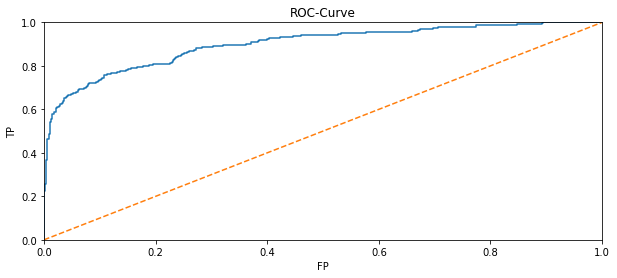

ROC-AUC score 0.8985035617280788


In [58]:
predicted_probalities_cat = search_cat.best_estimator_.predict_proba(features_test)[:, 1]
plot_rc(target_test, predicted_probalities_cat)

Confusion matrix, without normalization
[[1483   18]
 [ 119  141]]


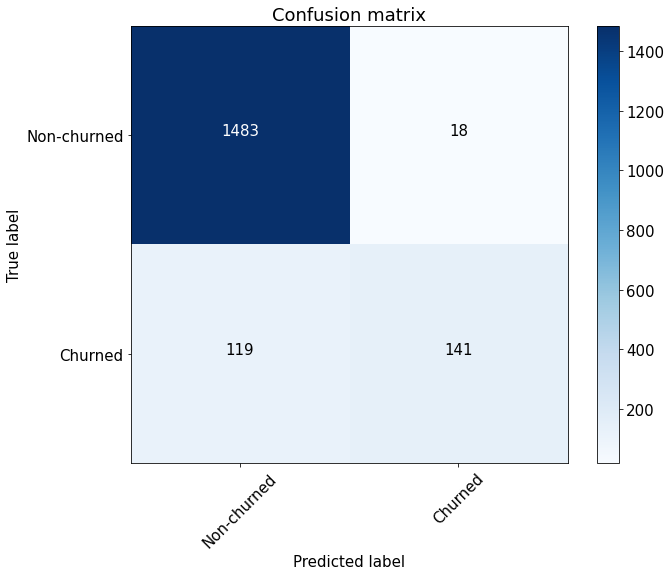

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(target_test, search_cat.predict(features_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')

plt.show()

In [60]:
features_train

,MonthlyCharges,TotalCharges,SeniorCitizen,AllDays,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
5949-EBSQK,-0.124626,-0.865526,0,-1.100489,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4760-XOHVN,-1.517779,-0.991667,0,-1.233491,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2607-FBDFF,-0.537596,-0.986509,0,-1.278800,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3125-RAHBV,-1.489584,-0.796125,0,-0.343395,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2829-HYVZP,-1.506169,-0.740323,0,-0.033542,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830-IPXVJ,-1.507827,-0.444899,0,1.390027,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3621-CEOVK,1.160724,-0.138690,1,-0.521707,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
6582-PLFUU,-1.514462,-0.541967,0,0.945710,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Отчет по проекту

Основная задача проекта была в необходимости для оператора связи построить модель машинного обучения которая сможет предсказывать с высокой вероятностью  перестанет ли пользоваться клиент услугами Оператора связи «Ниединогоразрыва.ком» или нет.
В ходе проекта были выполнены следующие ключевые шаги:
-  Предобработка данных в которую входили ознакомление с датафреймами, изменение типа данных, били обнаружены неявные пропуски, которые были обработаны.
- Был проведен Исследовательский анализ данных (EDA) в котором были обнаружены различные инсайды которые более детально были описаны в ходе выполнения 2 части проекта, датафреймы были объедены в один датафрейм, так же был этап фичинг инжиниринга.
- Был определен целевой признак ['churn'], который определяет отказался ли клиент  от услуг оператора связи «Ниединогоразрыва.ком» 
- Был определен признак ['AllDays'] который определяет сколько времени клиент пользовался услугами оператора связи «Ниединогоразрыва.ком»
- Далее произвел подготовку данных к обучению,  разделил выборки на обучающую и тестовую, использовал кодирование методом OneHotEncoder и масштабировал количественные признаки.
-После определил использовать 2  модели градиентного-бустинга, а именно CatBoostClassifier и LGBMClassifier, были определенны следующие «фичи» MonthlyCharges, TotalCharges, SeniorCitizen,	AllDays, Type One year,  Type_Two year, PaperlessBilling_Yes, PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check, MultipleLines_Yes , gender_Male  , Partner_Yes, Dependents_Yes, 	InternetService_Fiber optic, InternetService_No, OnlineSecurity_Yes,	OnlineBackup_Yes,	DeviceProtection_Yes,	TechSupport_Yes, StreamingTV_Yes,	StreamingMovies_Yes
-По результатам кроссвалидации была выбрана лучшая модель CatBoostClassifier с гиперпараметрами  iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.3 показав результат на кроссвалидации 0.90, далее была проведена оценка модели на тестовой выборке где результат ROC-AUC score составил 0.89, что удовлетворяет условиям проекта.
